# 이미지 분류를 위한 데이터 전처리

---

In [1]:
from glob import glob
import os
import numpy as np
import pydicom
#import skimage.external.tifffile 
import matplotlib.pyplot as plt
#import imsave
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

---
## y_label

- 0과 1의 라벨링
- 다만 총 6개의 사진당 하나의 label이 부여되는 것을 고려해야한다

In [2]:
y_train = pd.read_csv("C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task3_dcm\\train_y_label.csv")
y_test = pd.read_csv("C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task3_dcm\\y_test.csv")

In [3]:
y_train.shape, y_test.shape

((331, 1), (126, 1))

## input_X

- train에서 규칙에서 벗어난 사진이 있음 133부턴 0이아니라 5가 다른 사진임
- 규격이 다르기 때문에 꼭 따로 훈련을 시켜야할 것으로 보인다
- array([ 10,  17,  24,  35, 117, 156, 160, 181, 195, 209, 219, 228, 269,
       273, 297]) 훈련셋 누락
- array([  8,  72,  74, 104, 113, 115, 119, 123, 131, 135]) 테스트셋 누락
- 198,22 자료 부분 누락 제외

In [4]:
##################################################################################
# 파일 주소 

dir_train = 'C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task3_dcm\\X_train2\\'
dir_test = 'C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\task3_dcm\\X_test2\\'
# dcm 파일 all reading 
dcm_files_train = glob(os.path.join(dir_train, '*.tif'))
dcm_files_test = glob(os.path.join(dir_test, '*.tif'))

##################################################################################
# 같은 쉐잎을 가지고 있는 데이터만 우선 적용할 예정
# train은 0마다 다른 흉상사진, test는 5마다 다른 흉상사진
# 우선 제외하려고함
#num_true_train  = [dcm_files_train[i][-5] != '0' for i in range(len(dcm_files_train))]
#num_true_test = [dcm_files_test[i][-5] != '5' for i in range(len(dcm_files_test))]

###################################################################################
# 데이터프레임을 이용하여 논리연산자로 제외하고 싶은 사진을 제거

#train_ad_df= pd.DataFrame(dcm_files_train)#[num_true_train]
#test_ad_df =pd.DataFrame(dcm_files_test)#[num_true_test]

In [5]:
def preprocess_grayscale(file_path, target_size=(224, 224)):
    # 이미지 불러오기
    image = Image.open(file_path)
    
    # 이미지 크기 조정
    image = image.resize(target_size)
    
    # 이미지를 흑백으로 변환
    #image = image.convert('L')
    
    # 이미지를 넘파이 배열로 변환 및 정규화
    image_array = np.array(image) / 255.0  # 정규화 (0~1 범위로)
    
    # 모델에 입력으로 제공하기 위해 넘파이 배열의 형태 변환 (차원 추가)
    image_array = np.expand_dims(image_array, axis=2)
    
    return image_array


In [6]:
X_train = np.array([preprocess_grayscale(dcm_files_train[i]) for i in range(len(dcm_files_train))])
X_test = np.array([preprocess_grayscale(dcm_files_test[i]) for i in range(len(dcm_files_test))])

In [7]:
X_train = np.tile(X_train, (1, 1, 1, 3)) # rgb 흑백이어서 채널을 늘리는 것
X_test = np.tile(X_test, (1, 1, 1, 3))

In [8]:
X_train.shape, X_test.shape

((331, 224, 224, 3), (126, 224, 224, 3))

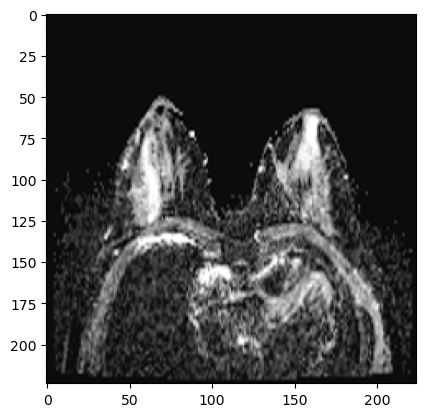

In [13]:
np.concatenate